In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

### Spliting the dataset inti training set and testing set

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
linreg=LinearRegression()

In [10]:
linreg.fit(xtrain,ytrain)

LinearRegression()

In [11]:
ypred=linreg.predict(xtest)

### VISUALIZING THE TRAINING MODEL

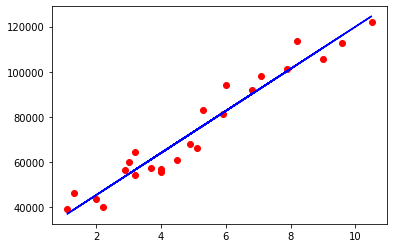

In [12]:
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,linreg.predict(xtrain),color='blue')

### VISUALIZING THE TESTING MODEL

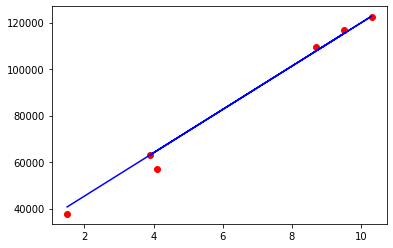

In [13]:
plt.scatter(xtest,ytest,color='red')
plt.plot(xtest,linreg.predict(xtest),color='blue')

In [14]:
dic={'X':xtest.flatten(),'Actual Y':ytest,'Predicted Y':ypred}
ac=pd.DataFrame(dic)
ac

,X,Actual Y,Predicted Y
0,1.5,37731.0,40748.961841
1,10.3,122391.0,122699.622956
2,4.1,57081.0,64961.657170
3,3.9,63218.0,63099.142145
4,9.5,116969.0,115249.562855
5,8.7,109431.0,107799.502753


In [15]:
linreg.predict([[3]])

array([54717.82453082])

In [17]:
from sklearn.metrics import mean_squared_error as mse,mean_absolute_error as mae,r2_score

In [18]:
print(f"MAE-:{mae(ytest,ypred)}")
print(f"MSE-:{mse(ytest,ypred)}")
print(f"RMSE-:{np.sqrt(mae(ytest,ypred))}")
print(f"Accuracy-:{r2_score(ytest,ypred)}")

MAE-:2446.1723690465055
MSE-:12823412.298126549
RMSE-:49.45879465824562
Accuracy-:0.988169515729126
